**Gabriela Nathania Harywanto <br>
2201797494**

# 1. SOM

Import library yang diperlukan

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Inisialisasi nilai-nilai yang ditetapkan pada soal

In [ ]:
P = np.array([
    [ 1, 2, -1],
    [-1, 3, -2]
]).astype(np.float32)
 
W = np.array([
     [ 1, 1,-1],
     [ 2, 1, 1],
     [-1, 2,-3],
     [ 1, 2, 3],
     [ 1, 1, 3]
]).astype(np.float32)
 
alpha = 0.5
 
r = 1
 
sigma_0 = 1
 
max_iter = 1000

Fungsi menghitung $Distance$

In [ ]:
def D(p,w):
  d = []
  for i in range(len(w)):
    tmp = 0
    for j in range(len(p)):
      tmp += (p[j]-w[i][j])**2
    d.append(np.sqrt(tmp))
  return d

Fungsi menghitung $\sigma(n)$

In [ ]:
def sigma(n):
  return sigma_0*np.exp(-n/max_iter)

Fungsi menghitung $Neighbour Strength$

In [ ]:
def NS(d,sigma):
  return np.exp(-(d*d)/(2*sigma*sigma))

Fungsi menghitung $W_{new}$

In [ ]:
def W_new(W_old,p,ns):
  return W_old + ns*alpha*(p-W_old)

## Calculation

Menjalankan perhitungan sebanyak ***maximum iteration***

In [ ]:
for iter in range(max_iter):
  # memilih pattern secara random (online learning)
  p = P[np.random.randint(0,2)]
 
  # menghitung distance pattern dengan setiap neuron
  dist = D(p,W)
 
  # mendapatkan id neuron terdekat (BMU)
  id_winner = np.argmin(dist)
 
  # memperbaharui W neuron tetangga
  for id in range(len(W)):
    d = abs(id-id_winner) # cari jarak dengan neuron lain
 
    if d <= r: #cari neuron yang jaraknya <= radius
 
      sigma_n = sigma(iter) # hitung sigma(n)
 
      ns = NS(d,sigma_n) # hitung neighbour strength
 
      W[id] = W_new(W[id],p,ns) # update W
      
print(W)

[[ 1.          2.         -1.        ]
 [ 0.06902723  2.465486   -1.4654864 ]
 [-1.          3.         -2.        ]
 [-0.99999994  2.9999998  -1.9999999 ]
 [ 1.          1.          3.        ]]


## Visualization

Visualisasi RGB

In [ ]:
# normalisasi W menjadi range [0..1] 
# karena RGB pada imshow hanya menerima nilai RBG
# [0..255] untuk bilangan bulat
# [0..1] untuk float
 
mini = 1000
maxi = -1000
for i in range(len(W)):
  for j in range(len(W[i])):
    mini = min(mini,W[i][j])
    maxi = max(maxi,W[i][j])
 
mini = -mini
maxi += mini
W += mini
 
for i in range(len(W)):
  for j in range(len(W[i])):
    W[i][j] = W[i][j]/maxi
 
W

array([[6.0000002e-01, 8.0000001e-01, 2.0000000e-01],
       [4.1380543e-01, 8.9309722e-01, 1.0690272e-01],
       [2.0000000e-01, 1.0000000e+00, 0.0000000e+00],
       [2.0000000e-01, 1.0000000e+00, 2.3841858e-08],
       [6.0000002e-01, 6.0000002e-01, 1.0000000e+00]], dtype=float32)

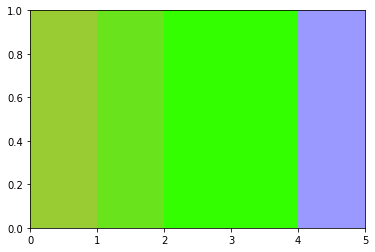

In [ ]:
#visualisasi dengan imshow
img = np.array(W).reshape((1, len(W), 3))
plt.imshow(img, extent=[0,5, 0, 1], aspect='auto')
plt.show()

In [ ]:
img.shape

(1, 5, 3)

# 2. PCA

Import library yang diperlukan

In [ ]:
import pandas as pd
from numpy import linalg as LA
from sklearn.decomposition import PCA

Inisialisasi data

In [ ]:
data = [
        
    # Data I
    [5.1, 3.5, 1.4, 0.2, 0],
    [4.9,   3, 1.4, 0.2, 0],
    [4.7, 3.2, 1.3, 0.2, 0],
    [4.6, 3.1, 1.5, 0.2, 0],
    [  5, 3.6, 1.4, 0.2, 0],
    [5.4, 3.9, 1.7, 0.4, 0],
    [4.6, 3.4, 1.4, 0.3, 0],
    [  5, 3.4, 1.5, 0.2, 0],
    [4.4, 2.9, 1.4, 0.2, 0],
    [4.9, 3.1, 1.5, 0.1, 0],

    # Data II
    [  7, 3.2, 4.7, 1.4, 1],
    [6.4, 3.2, 4.5, 1.5, 1],
    [6.9, 3.1, 4.9, 1.5, 1],
    [5.5, 2.3,   4, 1.3, 1],
    [6.5, 2.8, 4.6, 1.5, 1],
    [5.7, 2.8, 4.5, 1.3, 1],
    [6.3, 3.3, 4.7, 1.6, 1],
    [4.9, 2.4, 3.3,   1, 1],
    [6.6, 2.9, 4.6, 1.3, 1],
    [5.2, 2.7, 3.9, 1.4, 1],

    # Data III
    [6.3, 3.3,   6, 2.5, 2],
    [5.8, 2.7, 5.1, 1.9, 2],
    [7.1,   3, 5.9, 2.1, 2],
    [6.3, 2.9, 5.6, 1.8, 2],
    [6.5,   3, 5.8, 2.2, 2],
    [7.6,   3, 6.6, 2.1, 2],
    [4.9, 2.5, 4.5, 1.7, 2],
    [7.3, 2.9, 6.3, 1.8, 2],
    [6.7, 2.5, 5.8, 1.8, 2],
    [7.2, 3.6, 6.1, 2.5, 2]
]

Ubah data menjadi dataframe

In [ ]:
data = pd.DataFrame(data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'cluster'])

data

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Covariance Matrix, Eigen Value, and Eigen Vector

### Covariance Matrix 

In [ ]:
covariance_matrix = data.drop(columns=['cluster']).cov()

covariance_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.929437,-0.006621,1.589920,0.613195
sepal_width,-0.006621,0.139034,-0.237448,-0.085034
petal_length,1.589920,-0.237448,3.539644,1.446713
petal_width,0.613195,-0.085034,1.446713,0.622575


### Eigen Vlaue

In [ ]:
eigen_value, eigen_vector = LA.eig(covariance_matrix)

eigen_value

array([4.88325892, 0.26187349, 0.07725825, 0.00829899])

### Eigen Vector

In [ ]:
eigen_vector

array([[ 0.39532578, -0.76391507, -0.40461393,  0.31054608],
       [-0.04926785, -0.56346221,  0.74617672, -0.35114573],
       [ 0.84934414,  0.23996295,  0.01616932, -0.4698626 ],
       [ 0.34627263,  0.20337622,  0.52843773,  0.7479886 ]])

## PCA

In [ ]:
pca = PCA(n_components=2)
pca = pca.fit(data.drop(columns=['cluster']))
decomposed_data = pca.transform(data.drop(columns=['cluster']))

decomposed_data

array([[-2.75962938, -0.48854573],
       [-2.81406061, -0.05403161],
       [-2.98791375, -0.03793733],
       [-2.85265071,  0.14279299],
       [-2.80408874, -0.46850044],
       [-2.33668102, -0.830441  ],
       [-2.91773822, -0.02990435],
       [-2.70930076, -0.3318117 ],
       [-3.00679671,  0.38427215],
       [-2.76868024, -0.10671916],
       [ 1.22463279, -0.73501648],
       [ 0.85219575, -0.30432241],
       [ 1.39452308, -0.53394854],
       [ 0.04681702,  0.72966042],
       [ 0.99636989, -0.13133274],
       [ 0.52592032,  0.41512778],
       [ 1.01223248, -0.21594691],
       [-0.89372792,  0.9026763 ],
       [ 0.96172115, -0.30474571],
       [-0.14179501,  0.72979138],
       [ 2.42802523,  0.27904353],
       [ 1.28774975,  0.66108599],
       [ 2.53562275, -0.26839665],
       [ 1.86560388,  0.26607987],
       [ 2.24812013,  0.18629372],
       [ 3.32782654, -0.48238012],
       [ 0.36294911,  1.27664898],
       [ 2.85547056, -0.32986113],
       [ 2.21331016,

## Visualization
Pada visualisasi ini:
*   Ketiga kluster di lambangkan dengan 3 warna yang berbeda yang mana:
  *   **cluster 0** adalah Data I
  *   **cluster 1** adalah Data II
  *   **cluster 2** adalah Data III
*   Data di plot pada bidang koordinat x adalah komponen 1 dan y adalah komponen 2 dari hasil PCA
*   Terlihat ketiga kluster yang terpisah dengan baik


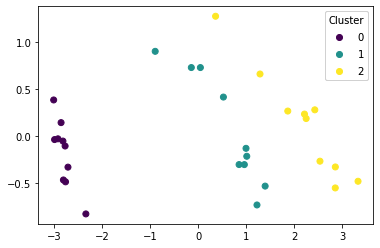

In [ ]:
X,Y = decomposed_data.T

fig, ax = plt.subplots()

scatter = ax.scatter(X, Y, c = data['cluster'])

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster")
ax.add_artist(legend1)

plt.show()

# 3. Convolution

Import library yang diperlukan

In [ ]:
from PIL import Image
import numpy as np

Inisialisasi

In [ ]:
kernels = np.array(
    [
     [
      [   0, 1/4,   0],
      [ 1/4, 1/4, 1/4],
      [   0, 1/4,   0]
     ],
     [
      [   1,   0, -1],
      [   1,   0, -1],
      [   1,   0, -1]
     ]
    ]
).astype('float32')
 
image = np.array(
    [
      [1,0,1,1,1,1,1,1,0,1],
      [1,0,1,1,1,1,1,1,1,1],
      [1,0,1,1,1,1,1,1,1,1],
      [1,0,0,0,0,0,0,1,1,1],
      [1,0,1,0,0,0,0,1,1,1],
      [1,0,0,0,0,0,0,1,1,1],
      [1,0,1,0,0,0,0,1,1,1],
      [1,1,0,0,0,0,0,0,0,0],
      [1,0,1,1,1,1,1,1,1,1],
      [1,0,1,1,1,1,1,1,1,1]
    ]
).astype('float32')
 
img_size = 10
kernel_size = 3
stride_kernel = 1
 
channel = len(kernels)
 
col_filtered = row_filtered = int((img_size-kernel_size)/stride_kernel+1)
 
filtered = np.zeros((row_filtered,col_filtered,channel))
 
pool_size = 2
stride_pool = 2
 
col_pooled = row_pooled= int((row_filtered-pool_size)/stride_pool+1)
pooled = np.zeros((row_pooled,col_pooled,channel))

Fungsi aktivasi **ReLU**

$ReLU(x) = max(0,x)$

In [ ]:
def ReLU(x):
  x[x<0] = 0
  return x

## Calculation

Menghitung **Convolution operation without border padding**, karena ada 2 kernel maka hasil konvolusi memiliki bentuk **(8x8x2)**
*   stride = 1
*   kernel shape = 3x3
*   number of kernel = 2
*   input shape = 10x10
*   output shape = 8x8x2

In [ ]:
for i in range(row_filtered):
  for j in range(col_filtered):   
    for ch in range(channel):
     tmp = 0      
     for ii in range(kernel_size):
        for jj in range(kernel_size):
          id_i = stride_kernel*i + ii
          id_j = stride_kernel*j + jj
          tmp += image[id_i][id_j]*kernels[ch][ii][jj]
     filtered[i][j][ch] = tmp
print(filtered[:,:,0])
print(filtered[:,:,1])

[[0.5  1.   1.25 1.25 1.25 1.25 1.25 1.  ]
 [0.5  0.75 1.   1.   1.   1.   1.25 1.25]
 [0.25 0.5  0.25 0.25 0.25 0.5  1.   1.25]
 [0.5  0.25 0.25 0.   0.   0.25 1.   1.25]
 [0.25 0.5  0.   0.   0.   0.25 1.   1.25]
 [0.75 0.25 0.25 0.   0.   0.25 0.75 1.  ]
 [0.5  0.75 0.25 0.25 0.25 0.25 0.5  0.5 ]
 [0.75 0.75 1.   1.   1.   1.   1.   1.  ]]
[[ 0. -3.  0.  0.  0.  0.  1.  0.]
 [ 1. -2.  0.  0.  0. -1. -1.  0.]
 [ 1. -1.  1.  0.  0. -2. -2.  0.]
 [ 2.  0.  1.  0.  0. -3. -3.  0.]
 [ 1.  0.  2.  0.  0. -3. -3.  0.]
 [ 2.  1.  1.  0.  0. -2. -2.  0.]
 [ 1.  0.  1.  0.  0. -1. -1.  0.]
 [ 1. -1.  0.  0.  0.  0.  0.  0.]]


Menerapkan fungsi aktivasi **ReLU**

In [ ]:
out_Relu = ReLU(filtered.copy())
print(out_Relu[:,:,0])
print(out_Relu[:,:,1])

[[0.5  1.   1.25 1.25 1.25 1.25 1.25 1.  ]
 [0.5  0.75 1.   1.   1.   1.   1.25 1.25]
 [0.25 0.5  0.25 0.25 0.25 0.5  1.   1.25]
 [0.5  0.25 0.25 0.   0.   0.25 1.   1.25]
 [0.25 0.5  0.   0.   0.   0.25 1.   1.25]
 [0.75 0.25 0.25 0.   0.   0.25 0.75 1.  ]
 [0.5  0.75 0.25 0.25 0.25 0.25 0.5  0.5 ]
 [0.75 0.75 1.   1.   1.   1.   1.   1.  ]]
[[0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0.]
 [2. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 2. 0. 0. 0. 0. 0.]
 [2. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


Melakukan **Max pooling for each 2x2 pixel**
*   stride = 2
*   pool shape = 2x2
*   input shape = 8x8x2
*   output shape = 4x4x2

In [ ]:
for i in range(row_pooled):
  for j in range(col_pooled):
    for ch in range(channel):
      tmp = 0
      for ii in range(pool_size):
        for jj in range(pool_size):
          id_i = stride_pool*i + ii
          id_j = stride_pool*j + jj
          tmp = max(tmp,out_Relu[id_i][id_j][ch])
      pooled[i][j][ch] = tmp
print(pooled[:,:,0])
print(pooled[:,:,1])

[[1.   1.25 1.25 1.25]
 [0.5  0.25 0.5  1.25]
 [0.75 0.25 0.25 1.25]
 [0.75 1.   1.   1.  ]]
[[1. 0. 0. 1.]
 [2. 1. 0. 0.]
 [2. 2. 0. 0.]
 [1. 1. 0. 0.]]


## Visualization

Visualisasi input image data (sebelum dilakukan konvolusi, Relu, pooling)

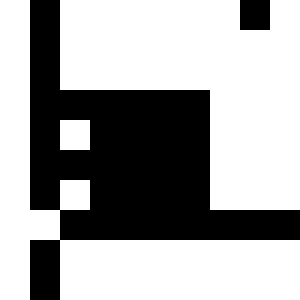

In [ ]:
tmp = (image * 255).astype(np.uint8)
img = Image.fromarray(tmp)
img = img.convert('L')
img = img.resize((300, 300), Image.NEAREST)
img

Visualisasi setelah dilakukan konvolusi

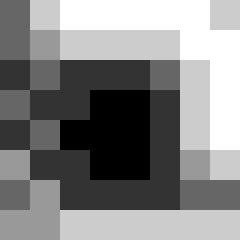

In [ ]:
# channel 1
 
filtered[:,:,0] = filtered[:,:,0] - filtered[:,:,0].min()
filtered[:,:,0] = filtered[:,:,0] / filtered[:,:,0].max()
 
tmp = (filtered[:,:,0] * 255).astype(np.uint8)
img = Image.fromarray(tmp)
img = img.convert('L')
img = img.resize((240, 240), Image.NEAREST)
img

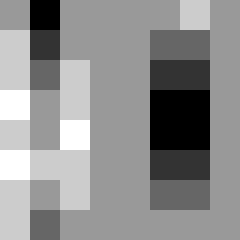

In [ ]:
# channel 2
 
filtered[:,:,1] = filtered[:,:,1] - filtered[:,:,1].min()
filtered[:,:,1] = filtered[:,:,1] / filtered[:,:,1].max()
 
tmp = (filtered[:,:,1] * 255).astype(np.uint8)
img = Image.fromarray(tmp)
img = img.convert('L')
img = img.resize((240, 240), Image.NEAREST)
img

Visualisasi setelah diterapkan fungsi aktivasi ReLU

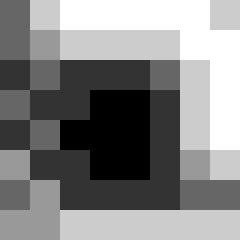

In [ ]:
# channel 1
 
out_Relu[:,:,0] = out_Relu[:,:,0] - out_Relu[:,:,0].min()
out_Relu[:,:,0] = out_Relu[:,:,0] / out_Relu[:,:,0].max()
 
tmp = (out_Relu[:,:,0] * 255).astype(np.uint8)
img = Image.fromarray(tmp)
img = img.convert('L')
img = img.resize((240, 240), Image.NEAREST)
img

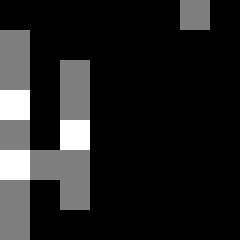

In [ ]:
# channel 2
 
out_Relu[:,:,1] = out_Relu[:,:,1] - out_Relu[:,:,1].min()
out_Relu[:,:,1] = out_Relu[:,:,1] / out_Relu[:,:,1].max()
 
tmp = (out_Relu[:,:,1] * 255).astype(np.uint8)
img = Image.fromarray(tmp)
img = img.convert('L')
img = img.resize((240, 240), Image.NEAREST)
img

Visualisai setelah pooling

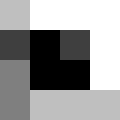

In [ ]:
# channel 1
 
pooled[:,:,0] = pooled[:,:,0] - pooled[:,:,0].min()
pooled[:,:,0] = pooled[:,:,0] / pooled[:,:,0].max()
 
tmp = (pooled[:,:,0] * 255).astype(np.uint8)
img = Image.fromarray(tmp)
img = img.convert('L')
img = img.resize((120, 120), Image.NEAREST)
img

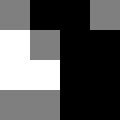

In [ ]:
# channel 2
 
pooled[:,:,1] = pooled[:,:,1] - pooled[:,:,1].min()
pooled[:,:,1] = pooled[:,:,1] / pooled[:,:,1].max()
 
tmp = (pooled[:,:,1] * 255).astype(np.uint8)
img = Image.fromarray(tmp)
img = img.convert('L')
img = img.resize((120, 120), Image.NEAREST)
img

# 4. CNN

## Questions Answers

**Why LeNet-5 is said consist of 5-layer networks? Please explain it!** <br><br>
LeNet-5 memiliki 7 layer tidak termasuk input layer. Lima layer pertama adalah layer untuk memproses kovolusi dan layer 2 layer sisanya adalah layer fully connected seperti neural network pada umumnya.

**Why in C1 there is 28x28 image pixels? Please sketch the process!** <br> <br>

karena pada layer C1, input yang memiliki ukuran 32x32 di konvolusi dengan kernel 5x5, tanpa padding nol(0), dan stride 1 sehingga menghasilkan output berukuran 28x28. Berikut ilustrasinya: (gambar animasi GIF)

In [ ]:
from IPython.display import Image
Image(url='https://i.ibb.co/3rnWGnF/convo.gif')

**Why in S2 there is 14x14 image pixels? Please draw the process!** <br> <br>

karena pada layer S2, input yang memiliki ukuran 28x28 di pooling dengan ukuran pool 2x2 dan stride 2 sehingga menghasilkan output berukuran 14x14. Berikut ilustrasinya: (gambar animasi GIF)

In [ ]:
from IPython.display import Image
Image(url='https://i.ibb.co/tYmGvwg/pooling.gif')

**How many numbers of CNN weights in C1 and C3?** <br> <br>
*   C1 -> 150 (5x5x1x6)
*   C3 -> 2400 (5x5x6x16)



## Implementataion

### LeNet-5

Import library yang diperlukan

In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.utils import np_utils
import gzip
from requests import get
from keras.models import Sequential
from keras import models, layers
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


Download dataset

In [ ]:
def download_file(url, file_name):
    with open(file_name, "wb") as file:
        response = get(url)
        file.write(response.content)

In [ ]:
download_file('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'train-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'train-labels-idx1-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

In [ ]:
def read_mnist(images_path: str, labels_path: str):
    with gzip.open(labels_path, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path,'rb') as imagesFile:
        length = len(labels)
        # Load flat 28x28 px images (784 px), and convert them to 28x28 px
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
                        .reshape(length, 784) \
                        .reshape(length, 28, 28, 1)
        
    return features, labels

Prepare Train and Test set

In [ ]:
x_train, y_train = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
x_test, y_test = read_mnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

One-Hot encoding target (Y)

In [ ]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


Split Train set into train and validation

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

Arsitektur Model LeNet-5, dengan rincian sebagai berikut:

<table>
<thead>
<tr>
<th>Layer Type</th>
<th>Feature Map</th>
<th>Size</th>
<th>Kernel Size</th>
<th>Stride</th>
<th>Activation</th>
</tr>
</thead>
<tbody>

<tr align="center">
<td>Image</td>
<td>1</td>
<td>28x28</td>
<td>-</td>
<td>-</td>
<td>-</td>
</tr>

<tr align="center">
<td>Convolution</td>
<td>6</td>
<td>28x28</td>
<td>5×5</td>
<td>1</td>
<td>tanh</td>
</tr>

<tr align="center">
<td>Average Pooling</td>
<td>6</td>
<td>14x14</td>
<td>2×2</td>
<td>2</td>
<td>-</td>
</tr>

<tr align="center">
<td>Convolution</td>
<td>16</td>
<td>10x10</td>
<td>5×5</td>
<td>1</td>
<td>tanh</td>
</tr>

<tr align="center">
<td>Average Pooling</td>
<td>16</td>
<td>5x5</td>
<td>2×2</td>
<td>2</td>
<td>-</td>
</tr>

<tr align="center">
<td>Convolution</td>
<td>120</td>
<td>1x1</td>
<td>5×5</td>
<td>1</td>
<td>tanh</td>
</tr>

<tr align="center">
<td>Fully Connected</td>
<td>-</td>
<td>84</td>
<td>-</td>
<td>-</td>
<td>tanh</td>
</tr>

<tr align="center">
<td>Fully Connected</td>
<td>-</td>
<td>10</td>
<td>-</td>
<td>-</td>
<td>softmax</td>
</tr>


</tbody>
</table>

Membangun model sesuai arsitektur

In [ ]:
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation="tanh", input_shape=(28,28,1), padding="same"))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation="tanh"))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation="tanh"))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation="tanh"))

#Output Layer with softmax activation
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="SGD", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)               

Training process

In [ ]:
hist = model.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 28s 573us/step - loss: 0.9850 - accuracy: 0.7929 - val_loss: 0.4195 - val_accuracy: 0.9133
Epoch 2/10
48000/48000 [==============================] - 27s 567us/step - loss: 0.3273 - accuracy: 0.9253 - val_loss: 0.2639 - val_accuracy: 0.9350
Epoch 3/10
48000/48000 [==============================] - 27s 567us/step - loss: 0.2342 - accuracy: 0.9420 - val_loss: 0.2063 - val_accuracy: 0.9485
Epoch 4/10
48000/48000 [==============================] - 27s 567us/step - loss: 0.1912 - accuracy: 0.9501 - val_loss: 0.1734 - val_accuracy: 0.9541
Epoch 5/10
48000/48000 [==============================] - 27s 569us/step - loss: 0.1650 - accuracy: 0.9560 - val_loss: 0.1548 - val_accuracy: 0.9585
Epoch 6/10
48000/48000 [==============================] - 27s 566us/step - loss: 0.1470 - accuracy: 0.9598 - val_loss: 0.1367 - val_accuracy: 0.9631
Epoch 7/10
48000/48000 [==============================] 

Testing process

In [ ]:
test_score = model.evaluate(x_test, y_test)
print("Loss {:.3f}".format(test_score[0]))
print("Accuracy {:.2f}%".format(test_score[1] * 100))

10000/10000 [==============================] - 3s 345us/step
Loss 0.094
Accuracy 97.30%


Visualisasi

Text(0, 0.5, 'acc')

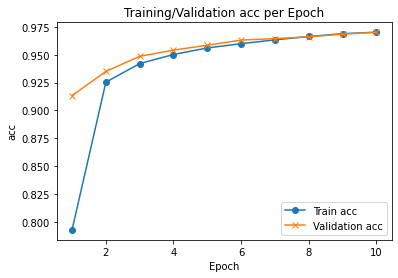

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + hist.history["accuracy"], "o-")
ax.plot([None] + hist.history["val_accuracy"], "x-")
ax.legend(["Train acc", "Validation acc"], loc = 0)
ax.set_title("Training/Validation acc per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("acc")

Text(0, 0.5, 'Loss')

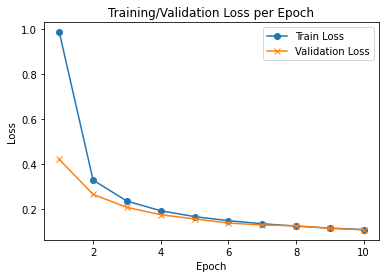

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + hist.history["loss"], "o-")
ax.plot([None] + hist.history["val_loss"], "x-")
ax.legend(["Train Loss", "Validation Loss"], loc = 0)
ax.set_title("Training/Validation Loss per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

### Modifikasi LeNet-5 
(menghilangkan 1 Fully Connected layer)

Arsitektur Model LeNet-5 yang termodifikasi, dengan rincian sebagai berikut:

<table>
<thead>
<tr>
<th>Layer Type</th>
<th>Feature Map</th>
<th>Size</th>
<th>Kernel Size</th>
<th>Stride</th>
<th>Activation</th>
</tr>
</thead>
<tbody>

<tr align="center">
<td>Image</td>
<td>1</td>
<td>28x28</td>
<td>-</td>
<td>-</td>
<td>-</td>
</tr>

<tr align="center">
<td>Convolution</td>
<td>6</td>
<td>28x28</td>
<td>5×5</td>
<td>1</td>
<td>tanh</td>
</tr>

<tr align="center">
<td>Average Pooling</td>
<td>6</td>
<td>14x14</td>
<td>2×2</td>
<td>2</td>
<td>-</td>
</tr>

<tr align="center">
<td>Convolution</td>
<td>16</td>
<td>10x10</td>
<td>5×5</td>
<td>1</td>
<td>tanh</td>
</tr>

<tr align="center">
<td>Average Pooling</td>
<td>16</td>
<td>5x5</td>
<td>2×2</td>
<td>2</td>
<td>-</td>
</tr>

<tr align="center">
<td>Convolution</td>
<td>120</td>
<td>1x1</td>
<td>5×5</td>
<td>1</td>
<td>tanh</td>
</tr>


<tr align="center">
<td>Fully Connected</td>
<td>-</td>
<td>10</td>
<td>-</td>
<td>-</td>
<td>softmax</td>
</tr>


</tbody>
</table>

Membangun model sesuai arsitektur

In [ ]:
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation="tanh", input_shape=(28,28,1), padding="same"))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation="tanh"))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation="tanh"))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

#Output Layer with softmax activation
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="SGD", metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Training process

In [ ]:
hist = model.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 27s 567us/step - loss: 0.9161 - accuracy: 0.8072 - val_loss: 0.4432 - val_accuracy: 0.8923
Epoch 2/10
48000/48000 [==============================] - 27s 563us/step - loss: 0.3562 - accuracy: 0.9120 - val_loss: 0.2844 - val_accuracy: 0.9280
Epoch 3/10
48000/48000 [==============================] - 27s 562us/step - loss: 0.2549 - accuracy: 0.9358 - val_loss: 0.2201 - val_accuracy: 0.9431
Epoch 4/10
48000/48000 [==============================] - 27s 561us/step - loss: 0.2071 - accuracy: 0.9461 - val_loss: 0.1857 - val_accuracy: 0.9517
Epoch 5/10
48000/48000 [==============================] - 27s 563us/step - loss: 0.1791 - accuracy: 0.9529 - val_loss: 0.1642 - val_accuracy: 0.9560
Epoch 6/10
48000/48000 [==============================] - 27s 567us/step - loss: 0.1599 - accuracy: 0.9575 - val_loss: 0.1496 - val_accuracy: 0.9600
Epoch 7/10
48000/48000 [==============================] 

Testing process

In [ ]:
test_score = model.evaluate(x_test, y_test)
print("Loss {:.3f}".format(test_score[0]))
print("Accuracy {:.2f}%".format(test_score[1] * 100))

10000/10000 [==============================] - 3s 340us/step
Loss 0.102
Accuracy 97.18%


Visualisasi

Text(0, 0.5, 'acc')

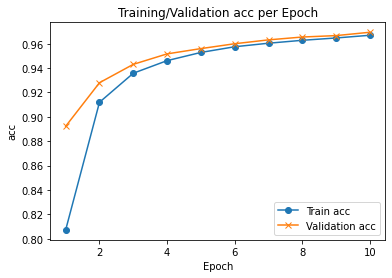

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + hist.history["accuracy"], "o-")
ax.plot([None] + hist.history["val_accuracy"], "x-")
ax.legend(["Train acc", "Validation acc"], loc = 0)
ax.set_title("Training/Validation acc per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("acc")

Text(0, 0.5, 'Loss')

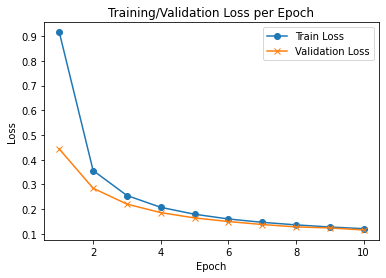

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + hist.history["loss"], "o-")
ax.plot([None] + hist.history["val_loss"], "x-")
ax.legend(["Train Loss", "Validation Loss"], loc = 0)
ax.set_title("Training/Validation Loss per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

### Conclusion
Dari hasil modifikasi membuang 1 layer fully connected, di dapat hasil akurasi yang sedikit lebih rendah dari pada arsitektur LeNet-5 tanpa modofikasi. Layer-layer konvolusi telah memberikan dampak yang besar sehingga penghapusan 1 layer fully connected tidak memperngaruhi hasil akurasi secara signifikan.